In [3]:
import pandas as pd
import numpy as np
import scipy.stats as stats

In [187]:
size = 3
period = 7

market_ = stats.norm.rvs(size=(size, period), loc=0, scale=1)
brownian_ = stats.norm.rvs(size=(size, period), loc=0, scale=1)

In [176]:
rho = 0.05

In [188]:
hc_ = rho * market_ + np.sqrt(1 - rho ** 2) * brownian_
hc_

array([[-0.41425909,  1.36550328,  0.15349363,  0.68799751,  0.34067532,
        -0.69706409,  0.85043006],
       [ 0.35867901, -0.12865714, -0.14249433,  1.5036424 , -0.52433473,
         0.06540607,  0.45364629],
       [ 0.34517245, -0.47332558, -0.81155228,  0.58795408, -0.56370473,
         0.29410779, -0.6992361 ]])

In [178]:
hc_[:, 1]

array([ 1.14569313, -1.26144929,  0.56097675])

In [179]:
hc = np.ones([size, ]) * 3000

In [180]:
h_xt = hc * np.exp(0.04 + (0.2 * hc_[:, 1]))
h_xt

array([3926.50970258, 2426.19073973, 3493.16303438])

In [181]:
dis_rate = np.exp((-1) * (0.02+0.04+0.000001))
dis_rate

0.941763591820186

In [182]:
h_xt * dis_rate

array([3697.84388082, 2284.89810549, 3289.73376607])

In [183]:
np.exp((0.02+0.04+0.00001)*(np.array(range(period)) + 1) * (-1))

array([0.94175512, 0.8869027 , 0.83524515, 0.7865964 , 0.74078118,
       0.69763447, 0.65700083])

In [184]:
def gen_labor_income(initial_hc, mu_h, sigma_h, eta, hc_, rf, size=20000, period=30):
    hc = np.ones([size, ]) * initial_hc
    
    hc_list = []
    for i in range(period):
        hc_t = hc * np.exp(mu_h + (sigma_h * hc_[:, i]))
        hc_list.append(hc_t)
        hc = hc_t
        
    return pd.DataFrame(hc_list).T

In [185]:
def get_discount_rate(rf, eta, period=30):
    dc_rate = np.exp((rf + 0.04 + eta) * (np.array(range(period)) + 1) * (-1))
    return dc_rate

In [189]:
dc_rate = get_discount_rate(0.02, 0.000001, 7)
dc_rate

array([0.94176359, 0.88691866, 0.83526771, 0.78662471, 0.74081452,
       0.69767214, 0.65704222])

In [190]:
gen_hc = gen_labor_income(3000, 0.04, 0.18, 0.000001, hc_, 0.02, 3, 7)

In [211]:
gen_hc.values

array([[2898.07189759, 3856.79390546, 4126.64652564, 4861.29396342,
        5379.66555492, 4938.95945324, 5990.84267564],
       [3330.67341637, 3387.2426918 , 3436.2035624 , 4688.07888116,
        4439.94783476, 4675.87223553, 5280.77069131],
       [3322.58578038, 3175.75285747, 2856.12357954, 3304.53923235,
        3107.53620897, 3410.19542309, 3129.60594677]])

In [212]:
gen_hc.values @ dc_rate

array([24788.17496801, 22719.91719511, 17668.37433002])

In [193]:
gen_hc.loc[:, 1:] @ dc_rate[1:]

0    22058.876368
1    19583.210235
2    14539.284011
dtype: float64

In [171]:
size = 3
period = 7

market_ = stats.norm.rvs(size=(size, period + 1), loc=0, scale=1)
brownian_ = stats.norm.rvs(size=(size, period + 1), loc=0, scale=1)

In [172]:
mu_market, sigma_market, market_, rf

NameError: name 'mu_market' is not defined

In [173]:
np.exp(mu_market - (0.5*(sigma_market**2)) + sigma_market*market_)

NameError: name 'mu_market' is not defined

In [174]:
np.exp(0.12 - (0.5*(0.2**2)) + 0.2*market_)

array([[1.46979659, 0.97247985, 1.20278496, 1.16361759, 1.46188086,
        1.43209681, 1.01864031, 0.91996288],
       [1.05861766, 0.92828734, 0.86088321, 0.81171764, 1.05084772,
        0.91280745, 1.25608006, 0.90933559],
       [1.29419096, 1.53041556, 1.08613072, 0.87411499, 1.20327094,
        0.63503883, 1.0442329 , 0.84678021]])

In [196]:
a = np.exp(0.02 - (0.5*(0.02**2)) + 0.02*market_)
a

array([[1.01149237, 1.00663271, 0.99970779, 1.02496712, 1.00777127,
        1.04222763, 1.00914654],
       [0.99597165, 1.01642513, 1.01575216, 1.05382119, 1.03488798,
        1.03655729, 1.04313883],
       [1.02969177, 1.04206496, 1.0043604 , 1.00691224, 1.03467806,
        1.00929106, 1.0237603 ]])

In [197]:
b = np.exp(0.02 * np.ones(market_.shape))
b

array([[1.02020134, 1.02020134, 1.02020134, 1.02020134, 1.02020134,
        1.02020134, 1.02020134],
       [1.02020134, 1.02020134, 1.02020134, 1.02020134, 1.02020134,
        1.02020134, 1.02020134],
       [1.02020134, 1.02020134, 1.02020134, 1.02020134, 1.02020134,
        1.02020134, 1.02020134]])

In [198]:
np.concatenate([a, b]).T

array([[1.01149237, 0.99597165, 1.02969177, 1.02020134, 1.02020134,
        1.02020134],
       [1.00663271, 1.01642513, 1.04206496, 1.02020134, 1.02020134,
        1.02020134],
       [0.99970779, 1.01575216, 1.0043604 , 1.02020134, 1.02020134,
        1.02020134],
       [1.02496712, 1.05382119, 1.00691224, 1.02020134, 1.02020134,
        1.02020134],
       [1.00777127, 1.03488798, 1.03467806, 1.02020134, 1.02020134,
        1.02020134],
       [1.04222763, 1.03655729, 1.00929106, 1.02020134, 1.02020134,
        1.02020134],
       [1.00914654, 1.04313883, 1.0237603 , 1.02020134, 1.02020134,
        1.02020134]])

In [199]:
np.array([0.7, 0.3]).repeat(3)

array([0.7, 0.7, 0.7, 0.3, 0.3, 0.3])

In [209]:
def gen_finasset_ret(mu_market, sigma_market, market_, rf, size=20000, period=30):
    risky_asset_ret = np.exp(mu_market - (0.5*(sigma_market**2)) + sigma_market*market_)
    rf_asset_ret = np.exp(rf * np.ones(market_.shape))
    
    return risky_asset_ret, rf_asset_ret

In [210]:
dd = gen_finasset_ret(0.12, 0.2, market_, 0.02, size=3, period=7)
dd

(array([[1.01640139, 0.96861127, 0.90400307, 1.16021497, 0.97962275,
         1.37108678, 0.99307373],
        [0.87078095, 1.06707043, 1.06002638, 1.53146965, 1.27753424,
         1.29829156, 1.38312121],
        [1.214819  , 1.36894836, 0.94696724, 0.97130436, 1.27494532,
         0.99449681, 1.14662653]]),
 array([[1.02020134, 1.02020134, 1.02020134, 1.02020134, 1.02020134,
         1.02020134, 1.02020134],
        [1.02020134, 1.02020134, 1.02020134, 1.02020134, 1.02020134,
         1.02020134, 1.02020134],
        [1.02020134, 1.02020134, 1.02020134, 1.02020134, 1.02020134,
         1.02020134, 1.02020134]]))

In [218]:
(0.7 * 5000)

3500.0

In [217]:
(0.7 * 5000) * dd[0].cumprod(axis=1)

array([[ 3557.40485591,  3445.74243594,  3114.96175727,  3614.02525204,
         3540.38135033,  4854.17007894,  4820.54876443],
       [ 3047.73332088,  3252.14611995,  3447.36068626,  5279.528275  ,
         6744.77815364,  8756.68852119, 12111.56163488],
       [ 4251.8664832 ,  5820.58564028,  5511.90393719,  5353.73631822,
         6825.72106587,  6788.15784635,  7783.48186226]])

In [219]:
(0.3 * 5000) * dd[1].cumprod(axis=1)

array([[1530.30201004, 1561.21616129, 1592.75481982, 1624.93060151,
        1657.75637711, 1691.24527737, 1725.41069829],
       [1530.30201004, 1561.21616129, 1592.75481982, 1624.93060151,
        1657.75637711, 1691.24527737, 1725.41069829],
       [1530.30201004, 1561.21616129, 1592.75481982, 1624.93060151,
        1657.75637711, 1691.24527737, 1725.41069829]])

In [236]:
cd = ((0.7 * 5000) * dd[0].cumprod(axis=1) + (0.3 * 5000) * dd[1].cumprod(axis=1))[:, 5] + gen_hc.loc[:, 1:] @ dc_rate[1:]
cd
np.mean(cd**(1-10) / (1-10))

-2.516644815429044e-41

In [231]:
cd**(1-2) / (1-5)

0   -3.734352e-19
1   -3.073636e-19
2   -8.904670e-19
dtype: float64

In [232]:
np.mean(cd**(1-2) / (1-2))

-5.23755256986217e-19

In [237]:
cd = ((1 * 5000) * dd[0].cumprod(axis=1) + (0 * 5000) * dd[1].cumprod(axis=1))[:, 5] + gen_hc.loc[:, 1:] @ dc_rate[1:]
cd**(1-2) / (1-2)
np.mean(cd**(1-10) / (1-10))

-1.6418442975109228e-41

In [529]:
def get_finasset_wealth(fin_asset_ret, initial_wealth, nomial_ic, consume_rate, risky_weights, rf_weights, size=20000):
    #invest_amount = initial_wealth + (nomial_ic * (consume_rate))
    #risky_asset = (invest_amount*risky_weights) * fin_asset_ret[0].cumprod(axis=1)
    #rf_asset = (invest_amount*rf_weights) * fin_asset_ret[1].cumprod(axis=1)
    risky_asset = (risky_weights) * fin_asset_ret[0].cumprod(axis=1)
    rf_asset = (rf_weights) * fin_asset_ret[1].cumprod(axis=1)
    
    return risky_asset+rf_asset

In [530]:
def get_finasset_wealth(fin_asset_ret, risky_weights, rf_weights):
    #invest_amount = initial_wealth + (nomial_ic * (consume_rate))
    #risky_asset = (invest_amount*risky_weights) * fin_asset_ret[0].cumprod(axis=1)
    #rf_asset = (invest_amount*rf_weights) * fin_asset_ret[1].cumprod(axis=1)
    risky_asset = (risky_weights) * fin_asset_ret[0]
    rf_asset = (rf_weights) * fin_asset_ret[1]
    
    return risky_asset+rf_asset

In [460]:
size = 20000
period = 
gamma = 2

ic = 10000
fa = 100000

hcs = 0.15

r_s = 0.12
r_m = 0.33
rf = 0.04

np.random.seed(period)

market_ = stats.norm.rvs(size=(size, period), loc=0, scale=1)
brownian_ = stats.norm.rvs(size=(size, period), loc=0, scale=1)
hc_ = rho * market_ + np.sqrt(1 - rho ** 2) * brownian_

1.161834242728283

In [461]:
risky_weights = 1
rf_weights = 0.0

dc_rate = get_discount_rate(rf, 0.000001, period)
gen_hc = gen_labor_income(ic, 0.04, hcs, 0.000001, hc_, rf, size, period)

H = gen_hc.loc[:, 1:] @ dc_rate[1:]

fa_ret = gen_finasset_ret(0.12, r_m, market_, rf, size, period)
W = get_finasset_wealth(fa_ret, fa, ic, 0.7, risky_weights, rf_weights, size)

U = ((H + W[:, 0]) ** (1-gamma)) / (1-gamma)
-np.mean(U)

6.846470758257072e-06

In [462]:
risky_weights = 0.1
rf_weights = 0.9

dc_rate = get_discount_rate(rf, 0.000001, period)
gen_hc = gen_labor_income(ic, 0.04, hcs, 0.000001, hc_, rf, size, period)

H = gen_hc.loc[:, 1:] @ dc_rate[1:]

fa_ret = gen_finasset_ret(0.12, r_m, market_, rf, size, period)
W = get_finasset_wealth(fa_ret, fa, ic, 0.7, risky_weights, rf_weights, size)

U = ((H + W[:, 0]) ** (1-gamma)) / (1-gamma)
-np.mean(U)

6.788632276865979e-06

In [463]:
risky_weights = 0.2
rf_weights = 0.8

dc_rate = get_discount_rate(rf, 0.000001, period)
gen_hc = gen_labor_income(ic, 0.04, hcs, 0.000001, hc_, rf, size, period)

H = gen_hc.loc[:, 1:] @ dc_rate[1:]

fa_ret = gen_finasset_ret(0.12, r_m, market_, rf, size, period)
W = get_finasset_wealth(fa_ret, fa, ic, 0.7, risky_weights, rf_weights, size)

U = ((H + W[:, 0]) ** (1-gamma)) / (1-gamma)
-np.mean(U)

6.761770841364355e-06

In [464]:
risky_weights = 0.3
rf_weights = 0.7

dc_rate = get_discount_rate(rf, 0.000001, period)
gen_hc = gen_labor_income(ic, 0.04, hcs, 0.000001, hc_, rf, size, period)

H = gen_hc.loc[:, 1:] @ dc_rate[1:]

fa_ret = gen_finasset_ret(0.12, r_m, market_, rf, size, period)
W = get_finasset_wealth(fa_ret, fa, ic, 0.7, risky_weights, rf_weights, size)

U = ((H + W[:, 0]) ** (1-gamma)) / (1-gamma)
-np.mean(U)

6.7438804564763495e-06

In [465]:
risky_weights = 0.4
rf_weights = 0.6

dc_rate = get_discount_rate(rf, 0.000001, period)
gen_hc = gen_labor_income(ic, 0.04, hcs, 0.000001, hc_, rf, size, period)

H = gen_hc.loc[:, 1:] @ dc_rate[1:]

fa_ret = gen_finasset_ret(0.12, r_m, market_, rf, size, period)
W = get_finasset_wealth(fa_ret, fa, ic, 0.7, risky_weights, rf_weights, size)

U = ((H + W[:, 0]) ** (1-gamma)) / (1-gamma)
-np.mean(U)

6.734399300893371e-06

In [466]:
risky_weights = 0.5
rf_weights = 0.5

dc_rate = get_discount_rate(rf, 0.000001, period)
gen_hc = gen_labor_income(ic, 0.04, hcs, 0.000001, hc_, rf, size, period)

H = gen_hc.loc[:, 1:] @ dc_rate[1:]

fa_ret = gen_finasset_ret(0.12, r_m, market_, rf, size, period)
W = get_finasset_wealth(fa_ret, fa, ic, 0.7, risky_weights, rf_weights, size)

U = ((H + W[:, 0]) ** (1-gamma)) / (1-gamma)
-np.mean(U)

6.732979827507835e-06

In [467]:
risky_weights = 0.7
rf_weights = 0.3

dc_rate = get_discount_rate(rf, 0.000001, period)
gen_hc = gen_labor_income(ic, 0.04, hcs, 0.000001, hc_, rf, size, period)

H = gen_hc.loc[:, 1:] @ dc_rate[1:]

fa_ret = gen_finasset_ret(0.12, r_m, market_, rf, size, period)
W = get_finasset_wealth(fa_ret, fa, ic, 0.7, risky_weights, rf_weights, size)

U = ((H + W[:, 0]) ** (1-gamma)) / (1-gamma)
-np.mean(U)

6.753808114914525e-06

In [468]:
risky_weights = 0.9
rf_weights = 0.1

dc_rate = get_discount_rate(rf, 0.000001, period)
gen_hc = gen_labor_income(ic, 0.04, hcs, 0.000001, hc_, rf, size, period)

H = gen_hc.loc[:, 1:] @ dc_rate[1:]

fa_ret = gen_finasset_ret(0.12, r_m, market_, 0.02, size, period)
W = get_finasset_wealth(fa_ret, fa, ic, 0.7, risky_weights, rf_weights, size)

U = ((H + W[:, 0]) ** (1-gamma)) / (1-gamma)
-np.mean(U)

6.817680932864145e-06

In [469]:
risky_weights = 1
rf_weights = 0.0

dc_rate = get_discount_rate(rf, 0.000001, period)
gen_hc = gen_labor_income(ic, 0.04, hcs, 0.000001, hc_, rf, size, period)

H = gen_hc.loc[:, 1:] @ dc_rate[1:]

fa_ret = gen_finasset_ret(0.12, r_m, market_, rf, size, period)
W = get_finasset_wealth(fa_ret, fa, ic, 0.7, risky_weights, rf_weights, size)

U = ((H + W[:, 0]) ** (1-gamma)) / (1-gamma)
-np.mean(U)

6.846470758257072e-06

In [592]:
def get_finasset_wealth(fin_asset_ret, risky_weights, rf_weights):
    #invest_amount = initial_wealth + (nomial_ic * (consume_rate))
    #risky_asset = (invest_amount*risky_weights) * fin_asset_ret[0].cumprod(axis=1)
    #rf_asset = (invest_amount*rf_weights) * fin_asset_ret[1].cumprod(axis=1)
    risky_asset = (risky_weights) * fin_asset_ret[0]
    rf_asset = (rf_weights) * fin_asset_ret[1]
    
    return risky_asset+rf_asset

In [610]:
def rosen(x, fin_asset_ret, H, fa, i):
    W = get_finasset_wealth(fin_asset_ret, x[0], x[1])
    
    return ((((fa * W[:, i]) + H) ** (1-gamma)) / (1-gamma)).mean() * -1

In [474]:
from scipy.optimize import minimize

In [625]:
size = 20000
period = 30
gamma = 10

ic = 3000
fa = 1000

hc_g = 0.04
hcs = 0.15

cs_r = 0.7

r_s = 0.12
r_m = 0.33
rf = 0.04

eta = 0.000001

In [603]:
np.shape(fa_ret)

(2, 20000, 30)

In [646]:
np.random.seed(period)

market_ = stats.norm.rvs(size=(size, period), loc=0, scale=1)
brownian_ = stats.norm.rvs(size=(size, period), loc=0, scale=1)
hc_ = rho * market_ + np.sqrt(1 - rho ** 2) * brownian_

dc_rate = get_discount_rate(rf, eta, period)
gen_hc = gen_labor_income(ic, hc_g, hcs, eta, hc_, rf, size, period)

fa_ret = gen_finasset_ret(r_s, r_m, market_, rf, size, period)

for i in list(range(period)):
    
    if i == (period-1):
        H = 0
    else:
        H = gen_hc.loc[:, i+1:] @ dc_rate[i+1:]
    
    weights = np.ones([2]) / 2
    #W = pd.DataFrame(get_finasset_wealth(fa_ret, weights[0], weights[1])).loc[:, i]
    
    cons = ({'type': 'ineq', 'fun': lambda weights: -1.0 + np.sum(weights)},
            {'type': 'ineq', 'fun': lambda weights: weights})
    
    optimized = minimize(rosen, weights, (fa_ret, H, fa, i), method="COBYLA", constraints=cons)
    
    if not optimized.success: raise BaseException(optimized.message)
    print(optimized.x)
    
    fa = np.mean(fa * W[:, i])    

SystemError: double_from_pyobj failed in converting argument f of call-back function cb_calcfc_in__cobyla__user__routines to C double


In [647]:
WW = pd.DataFrame(get_finasset_wealth(fa_ret, weights[0], weights[1])).loc[:, 1]

In [658]:
import matplotlib.pyplot as plt

In [660]:
gamma = 10

In [661]:
def rosen(x, fin_asset_ret, H, fa, i):
    W = pd.DataFrame(get_finasset_wealth(fa_ret, x[0], x[1])).loc[:, i]
    
    return ((((fa * W) + H) ** (1-gamma)) / (1-gamma))

In [716]:
size = 200000
period = 20
gamma = 5

ic = 3000
fa = 20000

hc_g = 0.04
hcs = 0.05

cs_r = 0.7

r_s = 0.12
r_m = 0.33
rf = 0.04

eta = 0.000001

In [717]:
fa

20000

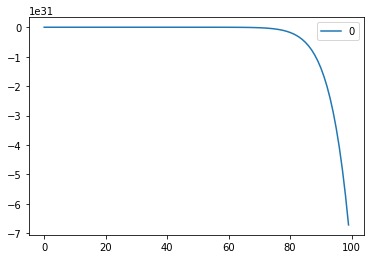

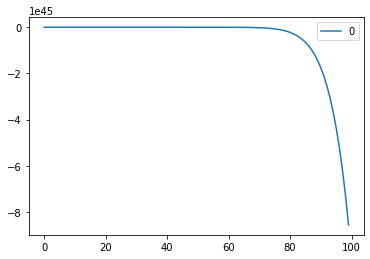

KeyboardInterrupt: 

In [718]:
np.random.seed(period)

market_ = stats.norm.rvs(size=(size, period), loc=0, scale=1)
brownian_ = stats.norm.rvs(size=(size, period), loc=0, scale=1)
hc_ = rho * market_ + np.sqrt(1 - rho ** 2) * brownian_

dc_rate = get_discount_rate(rf, eta, period)
gen_hc = gen_labor_income(ic, hc_g, hcs, eta, hc_, rf, size, period)

fa_ret = gen_finasset_ret(r_s, r_m, market_, rf, size, period)

for i in list(range(period)):
    
    if i == (period-1):
        H = 0
    else:
        H = gen_hc.loc[:, i+1:] @ dc_rate[i+1:]
    
    u_list = []
    for j in range(100):
        WW = pd.DataFrame(get_finasset_wealth(fa_ret, 1-(j/100), (j/100))).loc[:, i]
        u = 1 / (((WW * fa) + gen_hc.loc[:, i:]@dc_rate[i:]) ** (1-gamma) / (1-gamma))
        u = np.mean(u)

        u_list.append(u)
    
        fa = np.mean(WW) * fa
        
    pd.DataFrame(u_list).plot()
    plt.show()

In [ ]:
U = ((H + W[:, 0]) ** (1-gamma)) / (1-gamma)

In [506]:
gen_hc.loc[:, 1:] @ dc_rate[1:]

0         87812.825140
1        150126.270398
2        203595.131470
3        245222.766186
4        188978.164964
             ...      
19995    206697.009180
19996    172799.590838
19997    212315.907423
19998    176833.966511
19999    328763.701848
Length: 20000, dtype: float64

In [507]:
fa * W[:, 0]

array([ 70357.0369736 ,  74267.447233  ,  63349.16586636, ...,
       113969.86378174,  72146.41839082, 103359.48053229])

In [508]:
fa * W[:, 0] + gen_hc.loc[:, 1:] @ dc_rate[1:]

0        158169.862113
1        224393.717631
2        266944.297337
3        341853.540239
4        277385.054708
             ...      
19995    320055.279566
19996    310310.819167
19997    326285.771205
19998    248980.384901
19999    432123.182381
Length: 20000, dtype: float64

In [504]:
pd.DataFrame(W)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.703570,1.767841,0.775083,1.247117,1.032848,1.180339,0.604099,1.801521,1.116131,0.741031,...,1.065712,0.915104,0.928630,1.517143,0.409605,1.820523,1.709102,0.857427,1.477876,0.609203
1,0.742674,0.691693,1.395169,0.756368,0.850530,0.805848,1.541870,0.566411,0.847120,1.413048,...,1.280563,1.462998,1.382462,0.590835,1.608597,1.875934,1.187904,0.769699,0.727360,1.060255
2,0.633492,0.708449,0.932575,0.753803,0.753246,0.698927,1.443227,0.675430,1.078379,0.920395,...,1.061947,1.044711,1.023460,0.794541,1.290890,0.905799,0.729279,1.437387,1.427047,0.651956
3,0.966308,0.751636,1.874063,1.426324,1.486456,0.756621,1.622550,0.972858,1.191252,1.233407,...,1.495678,1.362514,0.932726,1.291863,1.225099,1.268239,0.656550,0.876757,2.893057,0.958807
4,0.884069,0.815958,1.301390,0.944198,1.233666,1.265169,1.371293,1.220220,0.573366,1.204197,...,0.891673,0.806609,1.248217,1.210445,0.779396,0.739844,0.928540,1.008798,1.761449,1.606770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1.133583,1.759332,1.004802,1.281922,1.307701,1.859351,1.558534,0.993080,1.085310,0.778194,...,1.144983,1.674317,0.907978,0.933340,1.208240,0.621802,0.829313,1.127469,1.127129,1.157810
19996,1.375112,1.053524,1.036769,1.388394,1.035554,2.344119,0.978961,1.493827,1.318921,0.949858,...,0.792126,0.948881,0.482881,1.081864,1.343896,1.255348,1.735449,0.896286,0.807701,1.003728
19997,1.139699,0.906112,0.597319,1.076501,0.534634,1.437563,1.652357,1.575735,0.626619,1.419048,...,0.724686,0.755845,0.362730,1.381561,0.990794,0.900309,0.720388,0.988621,0.965873,1.314809
19998,0.721464,1.478306,1.143514,1.118889,0.490086,0.958785,0.818217,0.740038,1.144999,1.376876,...,1.334263,1.025991,1.003791,1.209238,0.646535,1.301815,0.756205,1.583057,0.596207,1.028302


In [485]:
gen_hc.loc[:, 29:].mean()

29    46803.486449
dtype: float64

In [483]:
gen_hc.loc[:, 29:]

,29
0,28076.444985
1,35005.563114
2,39455.686608
3,63453.266979
4,27213.050562
...,...
19995,46849.127972
19996,47251.473817
19997,65032.246634
19998,42683.710429
